In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df=pd.read_csv("bank.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   housing    11162 non-null  object
 5   loan       11162 non-null  object
 6   deposit    11162 non-null  object
dtypes: int64(1), object(6)
memory usage: 610.5+ KB


In [78]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for it in range (7):
    df.iloc[:,it]=le.fit_transform(df.iloc[:,it])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int32
 2   marital    11162 non-null  int32
 3   education  11162 non-null  int32
 4   housing    11162 non-null  int32
 5   loan       11162 non-null  int32
 6   deposit    11162 non-null  int32
dtypes: int32(6), int64(1)
memory usage: 348.9 KB


In [80]:
#df.iloc[:,[0,1,2,3,4,6]]

In [81]:
x=df.iloc[:,[0,1,2,3,4,6]]
y=df.iloc[:,5]

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

DecisionTreeClassifier

In [96]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=5)
decision_tree.fit(x_train, y_train)
predictValues =decision_tree.predict(x_test)

predictValues

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
#print("RMSE is:-")
#print(np.sqrt(metrics.mean_squared_error(y_test, predictValues)))

acc_test = accuracy_score(y_test, predictValues)
print ('Test_data Accuracy: %.2f' %acc_test)

Test_data Accuracy: 0.86


In [98]:
'''
data_feature_names = x.columns

from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

graph = Source(tree.export_graphviz(decision_tree, out_file=None, feature_names=data_feature_names, filled = True,rounded=True))


display(SVG(graph.pipe(format='svg')))

'''


"\ndata_feature_names = x.columns\n\nfrom sklearn.tree import export_graphviz\nfrom sklearn import tree\nfrom graphviz import Source\nfrom IPython.display import SVG\nfrom IPython.display import display\n\ngraph = Source(tree.export_graphviz(decision_tree, out_file=None, feature_names=data_feature_names, filled = True,rounded=True))\n\n\ndisplay(SVG(graph.pipe(format='svg')))\n\n"

In [99]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(decision_tree, out_file='tree.dot', 
                feature_names = x.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

KNeighborsClassifier

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [88]:
knn = KNeighborsClassifier(n_neighbors=1162)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=1162)

In [89]:
acc_test = accuracy_score(y_test, knn.predict(x_test))
print ('Test_data Accuracy: %.2f' %acc_test)

Test_data Accuracy: 0.86


LogisticRegression

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
lnr = LogisticRegression()

In [92]:
lnr.fit (x_train, y_train )

LogisticRegression()

In [93]:
predicted_y = lnr.predict(x_test)

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(y_test,predicted_y)

0.8593819973130318

In [63]:
abc=pd.read_csv("bank.csv")
abc

age          job  marital  education housing loan deposit
0       59       admin.  married  secondary     yes   no     yes
1       56       admin.  married  secondary      no   no     yes
2       41   technician  married  secondary     yes   no     yes
3       55     services  married  secondary     yes   no     yes
4       54       admin.  married   tertiary      no   no     yes
...    ...          ...      ...        ...     ...  ...     ...
11157   33  blue-collar   single    primary     yes   no      no
11158   39     services  married  secondary      no   no      no
11159   32   technician   single  secondary      no   no      no
11160   43   technician  married  secondary      no  yes      no
11161   34   technician  married  secondary      no   no      no

[11162 rows x 7 columns]

In [64]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   housing    11162 non-null  object
 5   loan       11162 non-null  object
 6   deposit    11162 non-null  object
dtypes: int64(1), object(6)
memory usage: 610.5+ KB


In [65]:
e=abc["marital"].unique()

In [66]:
f=abc["marital"].value_counts()   
print(f)

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


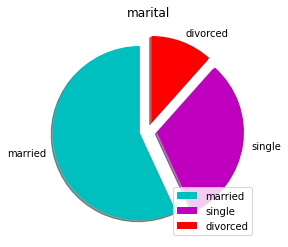

In [67]:
import matplotlib.pyplot as plt

slices = f.values
activities = f.index
cols = ['c','m','r']
outside = (0.1, 0.1, 0.1) 
plt.pie(slices,labels=activities,colors=cols,startangle=90,explode=outside,shadow=True)

plt.title('marital')
#plt.show()
#plt.pie(slices,labels=activities,colors=cols,startangle=90,shadow=False)
plt.legend(loc='lower right')
plt.show()


In [68]:
g=abc["job"].unique()
h=abc["job"].value_counts()   
print(h)
abc["job"].nunique()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


12

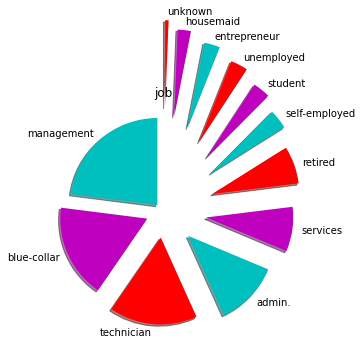

In [33]:
import matplotlib.pyplot as plt

slices = h.values
activities = h.index
cols = ['c','m','r']
outside = (0.1, 0.2, 0.3,0.4, 0.5, 0.6,0.7, 0.8, 0.9,1.0, 1.1, 1.2) 
plt.pie(slices,labels=activities,colors=cols,startangle=90,explode=outside,shadow=True)

plt.title('job')
#plt.show()
#plt.pie(slices,labels=activities,colors=cols,startangle=90,shadow=False)
#plt.legend(loc='right')
plt.show()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


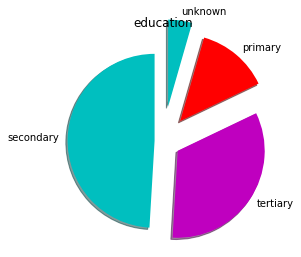

In [74]:
m=abc["education"].value_counts()   
print(m)

import matplotlib.pyplot as plt

slices = m.values
activities = m.index
cols = ['c','m','r']
outside = (0.1, 0.2, 0.3,0.4) 
plt.pie(slices,labels=activities,colors=cols,startangle=90,explode=outside,shadow=True)

plt.title('education')
#plt.show()
#plt.pie(slices,labels=activities,colors=cols,startangle=90,shadow=False)
#plt.legend(loc='right')
plt.show()

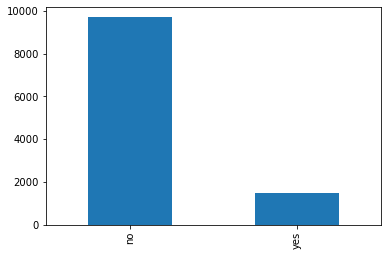

In [39]:
x=abc.loan.value_counts().plot(kind="bar")
plt.show()

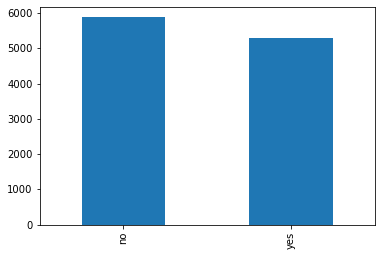

In [40]:
t=abc.deposit.value_counts().plot(kind="bar")
plt.show()